# **EN3160 -- Image Processing and Machine Vision**
##### Assignment 03

---

<br/>

<table>
  <tr>
    <td><strong>Name:</strong></td>
    <td><span style="font-size: 16px;">P.N. Kulasingham</span></td>
    <td><strong>Index No.:</strong></td>
    <td><span style="font-size: 16px;">210303U</span></td>
    <td><strong>Submission Date:</strong></td>
    <td><span style="font-size: 16px;">12.11.2024</span></td>
  </tr>
</table>

GitHub Repository: [Assignment 03 link](https://github.com/Pasindu-Nimsara-2002/Vision_assignment_03.git)

---
<h1 style="counter-reset: h1;">Question 01</h1>

<br/>

Files already downloaded and verified
Files already downloaded and verified
Epoch [1/10], Loss: 2.0340
Epoch [2/10], Loss: 1.7803
Epoch [3/10], Loss: 1.6967
Epoch [4/10], Loss: 1.6460
Epoch [5/10], Loss: 1.6059
Epoch [6/10], Loss: 1.5721
Epoch [7/10], Loss: 1.5418
Epoch [8/10], Loss: 1.5144
Epoch [9/10], Loss: 1.4912
Epoch [10/10], Loss: 1.4696


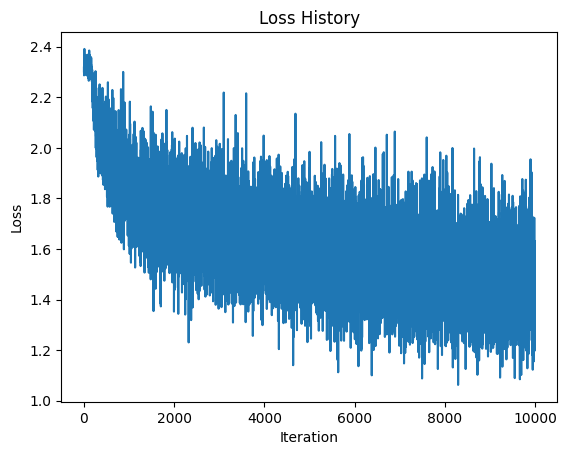

Training accuracy: 50.03%
Test accuracy: 47.14%


In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

batch_size = 50
trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

# 2. Define Network Parameters
Din = 3 * 32 * 32  # Input size (flattened CIFAR-10 image size)
H = 100  # Hidden layer size
K = 10  # Output size (number of classes in CIFAR-10)
std = 1e-5

# Initialize weights and biases
w1 = torch.randn(Din, H) * std  # Input to hidden layer
b1 = torch.zeros(H)
w2 = torch.randn(H, K) * std  # Hidden to output layer
b2 = torch.zeros(K)

# Hyperparameters
iterations = 10
lr = 2e-3  # Learning rate
lr_decay = 0.9  # Learning rate decay
reg = 0  # Regularization

loss_history = []

# Define Cross-Entropy Loss
criterion = nn.CrossEntropyLoss()

# 3. Training Loop
for epoch in range(iterations):
    running_loss = 0.0

    for i, data in enumerate(trainloader, 0):
        # Get inputs and labels
        inputs, labels = data
        Ntr = inputs.shape[0]  # Batch size
        x_train = inputs.view(Ntr, -1)  # Flatten input to (Ntr, Din)

        # Forward pass
        h = torch.sigmoid(x_train.mm(w1) + b1)  # Sigmoid activation for the hidden layer
        y_pred = h.mm(w2) + b2  # Output layer activation

        # Loss calculation (Cross-Entropy Loss with regularization)
        loss = criterion(y_pred, labels) + reg * (torch.sum(w1 ** 2) + torch.sum(w2 ** 2))
        loss_history.append(loss.item())
        running_loss += loss.item()

        # Backpropagation (Manual)
        dy_pred = torch.softmax(y_pred, dim=1) - nn.functional.one_hot(labels, K).float()  # Gradient for cross-entropy
        dw2 = h.t().mm(dy_pred) + reg * w2  # Gradient for w2
        db2 = dy_pred.sum(dim=0)  # Gradient for b2

        dh = dy_pred.mm(w2.t()) * h * (1 - h)  # Gradient through sigmoid activation
        dw1 = x_train.t().mm(dh) + reg * w1  # Gradient for w1
        db1 = dh.sum(dim=0)  # Gradient for b1

        # Update weights and biases
        w1 -= lr * dw1
        b1 -= lr * db1
        w2 -= lr * dw2
        b2 -= lr * db2

    # Print loss for every epoch
    print(f"Epoch [{epoch + 1}/{iterations}], Loss: {running_loss / len(trainloader):.4f}")


    # Learning rate decay
    lr *= lr_decay

# 4. Plotting the Loss History
plt.plot(loss_history)
plt.title("Loss History")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.show()

# 5. Evaluate on Training Set
with torch.no_grad():
    # Training accuracy
    correct_train = 0
    total_train = 0
    for data in trainloader:
        inputs, labels = data
        Ntr = inputs.shape[0]
        x_train = inputs.view(Ntr, -1)
        y_train_onehot = nn.functional.one_hot(labels, K).float()
        h = torch.sigmoid(x_train.mm(w1) + b1)
        y_train_pred = h.mm(w2) + b2
        predicted_train = torch.argmax(y_train_pred, dim=1)
        total_train += labels.size(0)
        correct_train += (predicted_train == labels).sum().item()
    train_acc = 100 * correct_train / total_train
    print(f"Training accuracy: {train_acc:.2f}%")

# 6. Evaluate on Test Set
with torch.no_grad():
    # Test accuracy
    correct_test = 0
    total_test = 0
    for data in testloader:
        inputs, labels = data
        Nte = inputs.shape[0]
        x_test = inputs.view(Nte, -1)
        y_test_onehot = nn.functional.one_hot(labels, K).float()
        h = torch.sigmoid(x_test.mm(w1) + b1)
        y_test_pred = h.mm(w2) + b2
        predicted_test = torch.argmax(y_test_pred, dim=1)
        total_test += labels.size(0)
        correct_test += (predicted_test == labels).sum().item()
    test_acc = 100 * correct_test / total_test
    print(f"Test accuracy: {test_acc:.2f}%")


---

### Question 02

<br/>

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms

# 1. Dataloading
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

batch_size = 64
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                     download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                         shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                    download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                        shuffle=False, num_workers=2)

# 2. Define LeNet-5 Network
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.pool2 = nn.MaxPool2d(2, 2)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool1(torch.relu(self.conv1(x)))
        x = self.pool2(torch.relu(self.conv2(x)))
        x = x.view(-1, 16 * 4 * 4)
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 3. Training and Evaluation
model = LeNet5()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader)}')

# Evaluate on Test Set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.9MB/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.22MB/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 10.4MB/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.66MB/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



Epoch [1/10], Loss: 0.2394528577971989
Epoch [2/10], Loss: 0.06971910694784829
Epoch [3/10], Loss: 0.04993594597278809
Epoch [4/10], Loss: 0.04006829816131428
Epoch [5/10], Loss: 0.03318088014371758
Epoch [6/10], Loss: 0.02880534447829124
Epoch [7/10], Loss: 0.0243775968546286
Epoch [8/10], Loss: 0.0201869977774825
Epoch [9/10], Loss: 0.019708461169356557
Epoch [10/10], Loss: 0.016168025018452336
Test Accuracy: 98.79%


---

### Question 03

<br/>

In [7]:
import urllib.request
import zipfile
import os

# Define URL and download path
url = "https://download.pytorch.org/tutorial/hymenoptera_data.zip"
download_path = "./data/hymenoptera_data.zip"
extract_path = "./data/"

# Download the file
urllib.request.urlretrieve(url, download_path)

# Extract the contents
with zipfile.ZipFile(download_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Clean up
os.remove(download_path)


In [11]:
import torch
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# Dataloading
transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

trainset = torchvision.datasets.ImageFolder(root='./data/hymenoptera_data/train', transform=transform)
trainloader = DataLoader(trainset, batch_size=32, shuffle=True, num_workers=4)

testset = torchvision.datasets.ImageFolder(root='./data/hymenoptera_data/val', transform=transform)
testloader = DataLoader(testset, batch_size=32, shuffle=False, num_workers=4)


In [12]:
# Fine-tuning ResNet18
resnet18 = torchvision.models.resnet18(pretrained=True)
num_ftrs = resnet18.fc.in_features
resnet18.fc = nn.Linear(num_ftrs, 2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.parameters(), lr=0.001)

num_epochs = 10
for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()
        outputs = resnet18(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader)}')

# Evaluate on Test Set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')



Epoch [1/10], Loss: 0.5095117129385471
Epoch [2/10], Loss: 0.4928608862683177
Epoch [3/10], Loss: 0.21801397018134594
Epoch [4/10], Loss: 0.18950171768665314
Epoch [5/10], Loss: 0.17136147525161505
Epoch [6/10], Loss: 0.1626406426075846
Epoch [7/10], Loss: 0.09197063092142344
Epoch [8/10], Loss: 0.06606286065652966
Epoch [9/10], Loss: 0.03170823096297681
Epoch [10/10], Loss: 0.015736740839201957
Test Accuracy: 54.90%


In [13]:
# ResNet18 as Feature Extractor
resnet18 = torchvision.models.resnet18(pretrained=True)
for param in resnet18.parameters():
    param.requires_grad = False

# Replace the final fully connected layer with a new one for fine-tuning
resnet18.fc = nn.Linear(resnet18.fc.in_features, 2)
resnet18 = resnet18.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet18.fc.parameters(), lr=0.001)

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)
        optimizer.zero_grad()

        # Forward pass, including the modified final layer
        outputs = resnet18(inputs)

        # Calculate loss and backpropagate
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss / len(trainloader)}')

# Evaluate on Test Set
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)

        # Directly get predictions with resnet18 as before
        outputs = resnet18(images)
        _, predicted = torch.max(outputs.data, 1)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

test_accuracy = 100 * correct / total
print(f'Test Accuracy: {test_accuracy:.2f}%')


Epoch [1/10], Loss: 0.6592947766184807
Epoch [2/10], Loss: 0.48952170833945274
Epoch [3/10], Loss: 0.37487058341503143
Epoch [4/10], Loss: 0.3042584117501974
Epoch [5/10], Loss: 0.2630578465759754
Epoch [6/10], Loss: 0.21606426872313023
Epoch [7/10], Loss: 0.2054290845990181
Epoch [8/10], Loss: 0.19700065907090902
Epoch [9/10], Loss: 0.17352799884974957
Epoch [10/10], Loss: 0.15679664257913828
Test Accuracy: 56.21%
